Anomaly Detection & Time Series Assignment

Assignment Code: DA-AG-018

Question 1: What is Anomaly Detection? Explain its types (point, contextual, and collective anomalies) with examples.
Answer:

Anomaly Detection is a technique used to identify unusual patterns or observations that do not conform to expected behavior in a dataset. These unusual data points are called anomalies or outliers.

Types of Anomalies:

Point Anomalies:
A single data point that is significantly different from others.
Example: A credit card transaction of ₹1,00,000 when the usual spending is ₹2,000.

Contextual Anomalies:
A data point that is abnormal in a specific context (time, location, season).
Example: High electricity usage at 3 AM is abnormal compared to daytime usage.

Collective Anomalies:
A group of data points that together form an anomaly, even if individual points seem normal.
Example: Continuous small failed login attempts over time indicating a hacking attempt.

Question 2: Compare Isolation Forest, DBSCAN, and Local Outlier Factor in terms of their approach and suitable use cases.
Answer:
Algorithm	Approach	Use Case
Isolation Forest	Isolates anomalies using random trees. Anomalies require fewer splits.	High-dimensional large datasets
DBSCAN	Density-based clustering. Points in low-density regions are anomalies.	Spatial or cluster-based datasets
Local Outlier Factor (LOF)	Measures local density deviation from neighbors.	Detecting local anomalies in clustered data

Summary:

Isolation Forest is fast and scalable.

DBSCAN is good when cluster shape is unknown.

LOF works best when anomalies depend on local density differences.

Question 3: What are the key components of a Time Series? Explain each with one example.


 Answer: Time Series components include:

Trend: Long-term movement in the data.
Example: Increasing online sales year after year.

Seasonality: Repeating short-term pattern.
Example: Increased ice cream sales during summer.

Cyclic Component: Long-term economic cycles.
Example: Business growth and recession phases.

Residual (Irregular): Random noise.
Example: Unexpected spike due to sudden event.


Question 4: Define Stationary in time series. How can you test and transform a non-stationary series into a stationary one?
Answer:

A time series is stationary if its mean, variance, and autocorrelation remain constant over time.

Testing Stationarity:

Augmented Dickey-Fuller (ADF) Test

KPSS Test

Rolling statistics visualization

Transforming to Stationary:

Differencing

Log transformation

Seasonal differencing

Question 5: Differentiate between AR, MA, ARIMA, SARIMA, and SARIMAX models.
Answer:
Model	Full Form	Description	Use Case
AR	AutoRegressive	Depends on past values	Stationary series
MA	Moving Average	Depends on past errors	Short-term forecasting
ARIMA	AR + I + MA	Handles non-stationary data	General forecasting
SARIMA	Seasonal ARIMA	Adds seasonal terms	Seasonal data
SARIMAX	SARIMA + Exogenous	Includes external variables	Weather-based forecasting

Question 6: AirPassengers Dataset – Plot & Decomposition

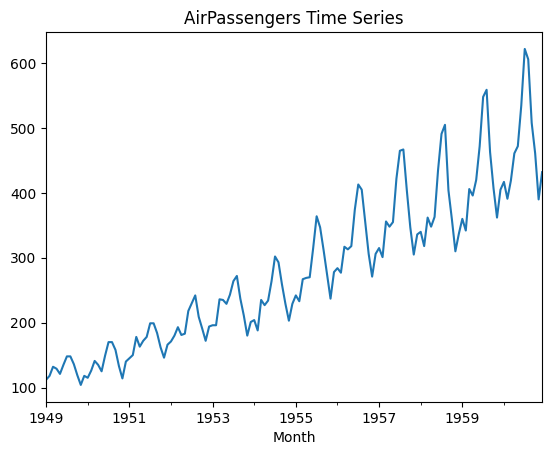

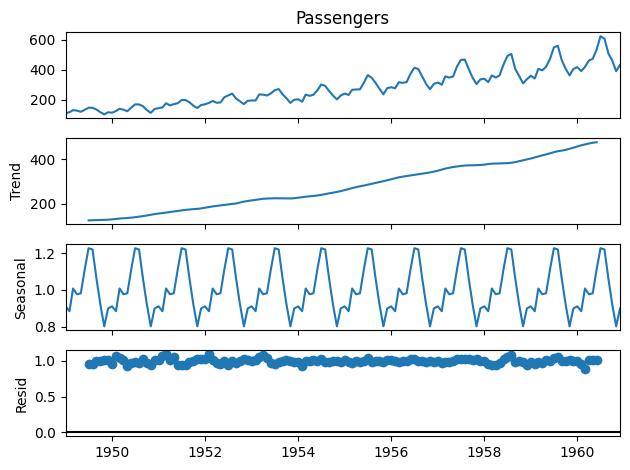

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Load AirPassengers dataset from CSV link
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
data = pd.read_csv(url, parse_dates=['Month'], index_col='Month')

# Rename column
data.columns = ['Passengers']

# Plot original series
plt.figure()
data['Passengers'].plot(title="AirPassengers Time Series")
plt.show()

# Decompose the series
decomposition = seasonal_decompose(data['Passengers'], model='multiplicative', period=12)
decomposition.plot()
plt.show()

Question 7: Isolation Forest on NYC Taxi Fare

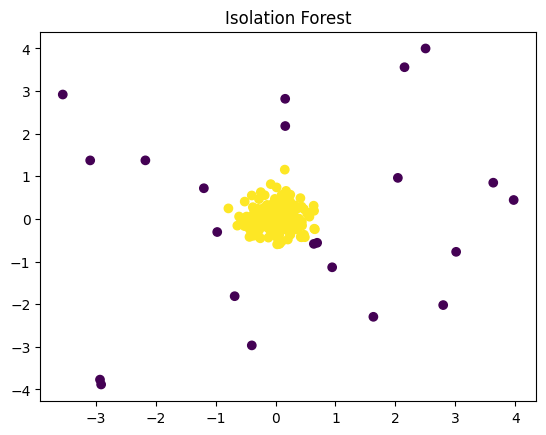

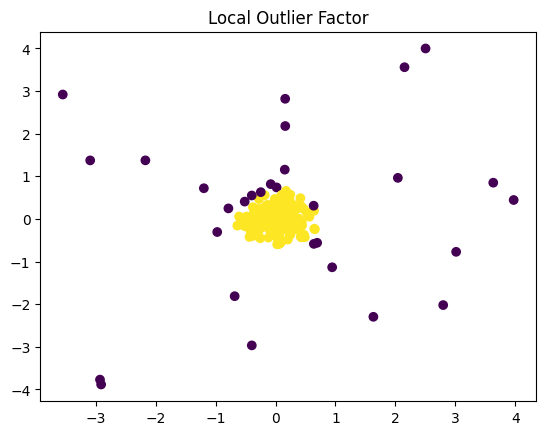

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

# Dummy data
np.random.seed(42)
X = 0.3 * np.random.randn(200, 2)

# Add some anomalies
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))
X = np.vstack([X, X_outliers])

# Isolation Forest
iso = IsolationForest(contamination=0.1)
y_iso = iso.fit_predict(X)

plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y_iso)
plt.title("Isolation Forest")
plt.show()

# LOF
lof = LocalOutlierFactor(n_neighbors=20)
y_lof = lof.fit_predict(X)

plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y_lof)
plt.title("Local Outlier Factor")
plt.show()

Question 8: SARIMA Forecasting

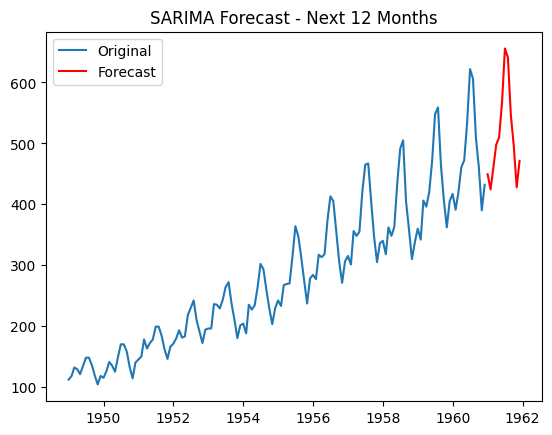

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# AirPassengers data manually
data_values = [
112,118,132,129,121,135,148,148,136,119,104,118,
115,126,141,135,125,149,170,170,158,133,114,140,
145,150,178,163,172,178,199,199,184,162,146,166,
171,180,193,181,183,218,230,242,209,191,172,194,
196,196,236,235,229,243,264,272,237,211,180,201,
204,188,235,227,234,264,302,293,259,229,203,229,
242,233,267,269,270,315,364,347,312,274,237,278,
284,277,317,313,318,374,413,405,355,306,271,306,
315,301,356,348,355,422,465,467,404,347,305,336,
340,318,362,348,363,435,491,505,404,359,310,337,
360,342,406,396,420,472,548,559,463,407,362,405,
417,391,419,461,472,535,622,606,508,461,390,432
]

dates = pd.date_range(start='1949-01-01', periods=len(data_values), freq='MS')
data = pd.DataFrame({'Passengers': data_values}, index=dates)

# Train SARIMA
model = SARIMAX(data['Passengers'],
                order=(1,1,1),
                seasonal_order=(1,1,1,12))

result = model.fit(disp=False)

# Forecast next 12 months
forecast = result.forecast(steps=12)

# Plot
plt.figure()
plt.plot(data.index, data['Passengers'], label='Original')
future_dates = pd.date_range(start=data.index[-1], periods=13, freq='MS')[1:]
plt.plot(future_dates, forecast, label='Forecast', color='red')
plt.legend()
plt.title("SARIMA Forecast - Next 12 Months")
plt.show()

Question 9: Local Outlier Factor (LOF)

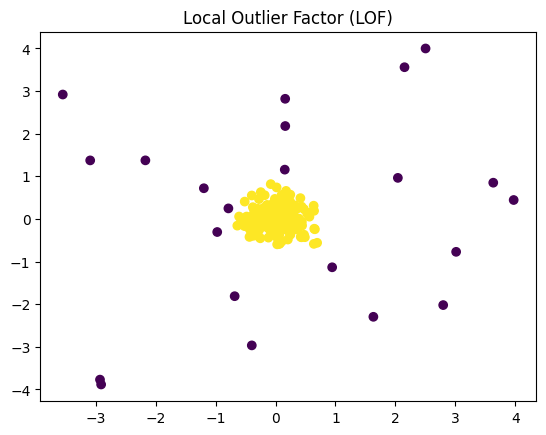

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor

# Create dummy data
np.random.seed(42)
normal_data = 0.3 * np.random.randn(200, 2)

# Add anomalies
anomalies = np.random.uniform(low=-4, high=4, size=(20, 2))

X = np.vstack([normal_data, anomalies])

# Apply LOF
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
y_pred = lof.fit_predict(X)

# Plot
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title("Local Outlier Factor (LOF)")
plt.show()